## Sacramento Police Citation (On-going Project, Python)
S. Cristel Irwin 

The objective of the project is to compare police citation data from years 2016 through 2022, - seven data sets in total. The data was collected from the City of Sacramento website's open data portal (https://data.cityofsacramento.org/search?collection=Dataset&tags=police). The report aims to look for patterns in the data and answer questions such as: <br>
<br>
1) In which areas are the most citations written? <br>
2) What are the reasons listed for the citations in these areas? <br>
3) What are the demographics of people receiving the citations? <br>
4) What is the median home income or home price in these areas? <br>
5) Per police badge or ID number, which officer(s) have issued the most citations in a given amount of time (6 months, 1 year, 2 years, 3 years, etc. & overall)? <br>
6) Which make/model of vehicle has recieved the most citations?<br>
7) Any additonal questions that need to be researched.
<br>

Steps: Data Cleaning, EDA/Statistical Findings, Feature Importance with ML Model (PCA) <br>
Deliverables: An analysis on the findings with visualizations in Python and PowerBi. <br>
<br>

Markdown Color Codes: <br>
1) New Step = <font color='black'>Black</font> <br>
2) Specific Feature Analysis = <font color='blue'>Blue</font> <br>
3) Findings = <font color='green'>Green</font> <br>
4) Requires further investigation = <font color='red'>Red</font> <br>
5) Subset Data Research = <font color='orange'>Orange</font> <br>
<br>

#### <font color='blue'>Officer Badge Numbers </font>

In [66]:
# Importing Python Libraries

import pandas as pd
import numpy as np
import re
import math, time, random, datetime
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# Uploading and renaming data

df_2016 = pd.read_csv("Sacramento_Citation_Data_2016.csv")
df_2017 = pd.read_csv("Sacramento_Citation_Data_2017.csv")
df_2018 = pd.read_csv("Sacramento_Citation_Data_2018.csv")
df_2019 = pd.read_csv("Sacramento_Citation_Data_2019.csv")
df_2020 = pd.read_csv("Sacramento_Citation_Data_2020.csv")
df_2021 = pd.read_csv("Sacramento_Citation_Data_2021.csv")
df_2022 = pd.read_csv("Sacramento_Citation_Data_2022.csv")


In [3]:
df_2016.head(1)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,PostedSpeed,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch
0,1,CS0016186,564.0,2016/02/28 08:25:00+00,00/28/2016 00:25:00,NaN,57866.0,DRIVER,34.0,M,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [4]:
df_2017.head(1)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,PostedSpeed,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch
0,1,CS0155524,974,2017/07/14 03:36:59+00,2017/07/14 03:36:59+00,NaN,198678,DRIVER,34.0,F,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2018.head(1)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,PostedSpeed,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch
0,1,CS0189001,530,2018/11/26 17:10:59+00,2018/11/26 17:10:59+00,NaN,375668.0,DRIVER,39,F,...,35.0,LIDAR,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [6]:
df_2019.head(1)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,PostedSpeed,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch
0,1,CS0193576,530.0,2019/06/10 21:40:00+00,2019/06/10 21:40:00+00,NaN,182938,DRIVER,18.0,M,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [7]:
df_2020.head(1)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,PostedSpeed,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch
0,1,CS0213518,270.0,2020/07/15 17:45:59+00,2020/07/15 17:45:59+00,NaN,211891,DRIVER,19,F,...,75.0,PACED,HANDHELD,NaN,N,NaN,NaN,WARNING ONLY,NaN,NaN


In [8]:
df_2021.head(1)

,CitationNumber,OfficerBadgeNo,CitationDate,CitationTime,OffenseDate,OffenseTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,...,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch,ObjectId
0,CS0210868,931.0,2021/01/08 00:00:00+00,2023/02/01 10:14:00+00,2021/01/08 00:00:00+00,2023/02/01 10:14:00+00,FOG,6866.0,DRIVER,25.0,...,LIDAR,HANDHELD,NaN,N,NaN,NaN,NaN,NaN,NaN,1


In [9]:
df_2022.head(1)

,CitationNumber,OfficerBadgeNo,CitationDate,CitationTime,OffenseDate,OffenseTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,...,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch,ObjectId
0,1322028,760.0,2022/01/01 00:00:00+00,2023/02/01 00:52:00+00,2022/01/01 00:00:00+00,2023/02/01 00:52:00+00,NaN,87.0,Driver,22.0,...,NaN,NaN,NaN,N,VEHICLE MADE MULTIPLE LANE CHANGES WITHOUT SIG...,NaN,NaN,NaN,4D,1


In [10]:
# There are 39 column features and 14376 entries/rows in the 2016 citation data set.

df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14376 entries, 0 to 14375
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ObjectId              14376 non-null  int64  
 1   CitationNumber        14376 non-null  object 
 2   OfficerBadgeNo        14374 non-null  float64
 3   CitationDateTime      14376 non-null  object 
 4   OffenseDateTime       14376 non-null  object 
 5   WeatherCondition      6831 non-null   object 
 6   CaseNumber            14374 non-null  float64
 7   ViolatorPartyType     14376 non-null  object 
 8   ViolatorAge           14367 non-null  float64
 9   ViolatorSex           14365 non-null  object 
 10  ViolatorRace          14350 non-null  object 
 11  ViolatorEthnicity     14346 non-null  object 
 12  VehYear               10351 non-null  float64
 13  VehMake               10363 non-null  object 
 14  VehModel              13692 non-null  object 
 15  VehType            

In [11]:
# Percentage of Null values in each column

nulls_in_2016 = df_2016.isnull().mean()*100
print(nulls_in_2016)

ObjectId                  0.000000
CitationNumber            0.000000
OfficerBadgeNo            0.013912
CitationDateTime          0.000000
OffenseDateTime           0.000000
WeatherCondition         52.483306
CaseNumber                0.013912
ViolatorPartyType         0.000000
ViolatorAge               0.062604
ViolatorSex               0.076516
ViolatorRace              0.180857
ViolatorEthnicity         0.208681
VehYear                  27.998052
VehMake                  27.914580
VehModel                  4.757930
VehType                   1.829438
PrimaryBlock             80.265721
PrimaryStreet             0.006956
CrossStreet              19.254313
DirectionOfTravel        38.063439
Arrest                    0.000000
ViolationStopResult       0.055648
ViolationOffenseType      0.000000
ViolationDescription      0.000000
Offense_Code              0.000000
OffenseSubCode            0.000000
Violation_Notes           0.946021
CourtRequired             0.000000
ObservedSpeed       

In [12]:
# There are 39 column features and 17576 entries/rows in the 2017 citation data set.
# 2017 data sets contains the same columns as the 2016 data set

df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17576 entries, 0 to 17575
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ObjectId              17576 non-null  int64  
 1   CitationNumber        17576 non-null  object 
 2   OfficerBadgeNo        17576 non-null  int64  
 3   CitationDateTime      17576 non-null  object 
 4   OffenseDateTime       17576 non-null  object 
 5   WeatherCondition      7728 non-null   object 
 6   CaseNumber            17576 non-null  int64  
 7   ViolatorPartyType     17576 non-null  object 
 8   ViolatorAge           17575 non-null  float64
 9   ViolatorSex           17576 non-null  object 
 10  ViolatorRace          17573 non-null  object 
 11  ViolatorEthnicity     17572 non-null  object 
 12  VehYear               14677 non-null  float64
 13  VehMake               14680 non-null  object 
 14  VehModel              16609 non-null  object 
 15  VehType            

In [13]:
# There are 39 column features and 16422  entries/rows in the 2018 citation data set.
# 2018 data sets contains the same columns as the 2016 and 2017 data sets

df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16422 entries, 0 to 16421
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ObjectId              16422 non-null  int64  
 1   CitationNumber        16412 non-null  object 
 2   OfficerBadgeNo        16422 non-null  int64  
 3   CitationDateTime      16422 non-null  object 
 4   OffenseDateTime       16422 non-null  object 
 5   WeatherCondition      2653 non-null   object 
 6   CaseNumber            16420 non-null  float64
 7   ViolatorPartyType     16422 non-null  object 
 8   ViolatorAge           16422 non-null  int64  
 9   ViolatorSex           16422 non-null  object 
 10  ViolatorRace          16422 non-null  object 
 11  ViolatorEthnicity     16422 non-null  object 
 12  VehYear               14500 non-null  float64
 13  VehMake               14508 non-null  object 
 14  VehModel              10267 non-null  object 
 15  VehType            

In [14]:
# There are 39 column features and 12543 entries/rows in the 2019 citation data set.
# 2019 data sets contains the same columns as the previous data sets.

df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12543 entries, 0 to 12542
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ObjectId              12543 non-null  int64  
 1   CitationNumber        12534 non-null  object 
 2   OfficerBadgeNo        12522 non-null  float64
 3   CitationDateTime      12543 non-null  object 
 4   OffenseDateTime       12543 non-null  object 
 5   WeatherCondition      1105 non-null   object 
 6   CaseNumber            12543 non-null  int64  
 7   ViolatorPartyType     12543 non-null  object 
 8   ViolatorAge           12542 non-null  float64
 9   ViolatorSex           12543 non-null  object 
 10  ViolatorRace          12543 non-null  object 
 11  ViolatorEthnicity     12543 non-null  object 
 12  VehYear               11517 non-null  float64
 13  VehMake               11521 non-null  object 
 14  VehModel              7058 non-null   object 
 15  VehType            

In [15]:
# There are 39 column features and 11118 entries/rows in the 2020 citation data set.
# 2020 data sets contains the same columns as the previous data sets.

df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ObjectId              11118 non-null  int64  
 1   CitationNumber        11118 non-null  object 
 2   OfficerBadgeNo        11116 non-null  float64
 3   CitationDateTime      11118 non-null  object 
 4   OffenseDateTime       11118 non-null  object 
 5   WeatherCondition      3286 non-null   object 
 6   CaseNumber            11118 non-null  int64  
 7   ViolatorPartyType     11118 non-null  object 
 8   ViolatorAge           11118 non-null  int64  
 9   ViolatorSex           11118 non-null  object 
 10  ViolatorRace          11114 non-null  object 
 11  ViolatorEthnicity     11112 non-null  object 
 12  VehYear               9251 non-null   float64
 13  VehMake               9261 non-null   object 
 14  VehModel              7581 non-null   object 
 15  VehType            

In [16]:
# There are 39 column features and 12242 entries/rows in the 2021 citation data set.
# 2021 data sets contains the same columns  as the previous data sets.

df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12242 entries, 0 to 12241
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CitationNumber        12239 non-null  object 
 1   OfficerBadgeNo        12207 non-null  float64
 2   CitationDate          12242 non-null  object 
 3   CitationTime          12242 non-null  object 
 4   OffenseDate           12242 non-null  object 
 5   OffenseTime           12242 non-null  object 
 6   WeatherCondition      3886 non-null   object 
 7   CaseNumber            12233 non-null  float64
 8   ViolatorPartyType     12242 non-null  object 
 9   ViolatorAge           12235 non-null  float64
 10  ViolatorSex           12242 non-null  object 
 11  ViolatorRace          12242 non-null  object 
 12  ViolatorEthnicity     12242 non-null  object 
 13  VehYear               10689 non-null  float64
 14  VehMake               10695 non-null  object 
 15  VehModel           

In [17]:
# There are 39 column features and 14327 entries/rows in the 2022 citation data set.
# 2022 data sets contains the same columns as the previous data sets.

df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14327 entries, 0 to 14326
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CitationNumber        14323 non-null  object 
 1   OfficerBadgeNo        14314 non-null  float64
 2   CitationDate          14327 non-null  object 
 3   CitationTime          14327 non-null  object 
 4   OffenseDate           14327 non-null  object 
 5   OffenseTime           14327 non-null  object 
 6   WeatherCondition      3324 non-null   object 
 7   CaseNumber            14325 non-null  float64
 8   ViolatorPartyType     14327 non-null  object 
 9   ViolatorAge           14323 non-null  float64
 10  ViolatorSex           14327 non-null  object 
 11  ViolatorRace          14327 non-null  object 
 12  ViolatorEthnicity     14323 non-null  object 
 13  VehYear               11780 non-null  float64
 14  VehMake               11788 non-null  object 
 15  VehModel           

In [18]:
# I used this code to check for duplicates in each dataset compared to the prior year. 
# None of the datasets had duplicates except for the 2022 dataset
# The number of rows changed from 14327 to 14323 

df_2022 = df_2022[~df_2022['CitationNumber'].isin(df_2021['CitationNumber'])]

In [19]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14323 entries, 0 to 14326
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CitationNumber        14323 non-null  object 
 1   OfficerBadgeNo        14310 non-null  float64
 2   CitationDate          14323 non-null  object 
 3   CitationTime          14323 non-null  object 
 4   OffenseDate           14323 non-null  object 
 5   OffenseTime           14323 non-null  object 
 6   WeatherCondition      3324 non-null   object 
 7   CaseNumber            14321 non-null  float64
 8   ViolatorPartyType     14323 non-null  object 
 9   ViolatorAge           14319 non-null  float64
 10  ViolatorSex           14323 non-null  object 
 11  ViolatorRace          14323 non-null  object 
 12  ViolatorEthnicity     14319 non-null  object 
 13  VehYear               11777 non-null  float64
 14  VehMake               11785 non-null  object 
 15  VehModel           

#### <font color='green'>Findings: All of the data sets contain null values several columns. Null values in categorical columns such as "VehMake", "VehModel",  "VehType", and "OfficerBadgeNo" will be dropped. Other columns will be investigated individually in order to determine if Nulls should be imputed or dropped.</font>

#### <font color='blue'>Weather Conditions</font>

In [20]:
# Weather column values for df_2016

df_2016['WeatherCondition'].value_counts()

CLEAR         5410
CLOUDY        1119
RAIN           271
FOG             28
SLEET/HAIL       3
Name: WeatherCondition, dtype: int64

In [21]:
# Weather column values for df_2017

df_2017['WeatherCondition'].value_counts()

CLEAR         6042
CLOUDY        1377
RAIN           294
FOG              9
SLEET/HAIL       6
Name: WeatherCondition, dtype: int64

In [22]:
# Weather column values for df_2018

df_2018['WeatherCondition'].value_counts()

CLEAR     1855
CLOUDY     655
RAIN        88
FOG         38
OTHER       17
Name: WeatherCondition, dtype: int64

In [23]:
# Weather column values for df_2019

df_2019['WeatherCondition'].value_counts()

CLEAR     827
CLOUDY    234
RAIN       34
FOG        10
Name: WeatherCondition, dtype: int64

In [24]:
# Weather column values for df_2020

df_2020['WeatherCondition'].value_counts()

CLEAR     2961
CLOUDY     235
FOG         45
RAIN        35
OTHER       10
Name: WeatherCondition, dtype: int64

In [25]:
# Weather column values for df_2021

df_2021['WeatherCondition'].value_counts()

CLEAR     3471
CLOUDY     250
RAIN        99
FOG         66
Name: WeatherCondition, dtype: int64

In [26]:
# Weather column values for df_2022

df_2022['WeatherCondition'].value_counts()

CLEAR      3033
CLOUDY      197
RAIN         69
FOG          24
UNKNOWN       1
Name: WeatherCondition, dtype: int64

#### <font color='green'> Findings: More citations were issued on "Clear" days which is not surprising. Sacramento is one of the "sunniest" cities in the u+United States having approximately 296 sunny/clear days per year. </font>

#### <font color='blue'>Officer Badge Numbers </font>

In [27]:
# OfficerBadgeNo column values for df_2016 (Top 20)

badge_nums_2016 = df_2016['OfficerBadgeNo'].value_counts()
badge_nums_2016.head(20)

530.0     1552
257.0     1514
886.0     1154
522.0      450
931.0      401
3006.0     392
211.0      365
897.0      363
592.0      322
660.0      316
298.0      315
876.0      309
380.0      298
3103.0     209
388.0      201
454.0      186
553.0      179
596.0      173
804.0      172
501.0      171
Name: OfficerBadgeNo, dtype: int64

In [28]:
# OfficerBadgeNo column values for df_2017

badge_nums_2017 = df_2017['OfficerBadgeNo'].value_counts()
badge_nums_2017.head(20)

522     2091
530     1954
931     1864
876     1729
886     1424
257      844
211      831
656      544
3066     359
600      281
592      270
298      244
388      243
455      237
1001     164
897      142
454      124
553      117
779      113
425      112
Name: OfficerBadgeNo, dtype: int64

In [29]:
# OfficerBadgeNo column values for df_2018

badge_nums_2018 = df_2018['OfficerBadgeNo'].value_counts()
badge_nums_2018.head(20)

530     3915
522     2209
876     1729
931     1661
3066    1490
886     1015
656      971
596      269
897      268
388      245
553      232
779      175
1003     148
511      145
962      117
592      114
1001     113
400       87
448       81
542       75
Name: OfficerBadgeNo, dtype: int64

In [30]:
# OfficerBadgeNo column values for df_2019

badge_nums_2019 = df_2019['OfficerBadgeNo'].value_counts()
badge_nums_2019.head(20)

530.0     3758
522.0     1681
931.0     1678
876.0     1428
3066.0     976
592.0      409
897.0      382
388.0      231
656.0      215
270.0      211
407.0      184
596.0      175
553.0      162
511.0      154
267.0      122
779.0      101
400.0       85
711.0       78
886.0       70
898.0       69
Name: OfficerBadgeNo, dtype: int64

In [31]:
# OfficerBadgeNo column values for df_2020

badge_nums_2020 = df_2020['OfficerBadgeNo'].value_counts()
badge_nums_2020.head(20)

530.0     1413
876.0     1230
592.0      981
931.0      886
407.0      860
270.0      843
3066.0     291
238.0      205
511.0      165
553.0      141
946.0      136
267.0      129
1001.0     123
897.0      122
656.0      119
388.0      118
356.0      106
902.0       85
779.0       72
958.0       65
Name: OfficerBadgeNo, dtype: int64

In [32]:
# OfficerBadgeNo column values for df_2021

badge_nums_2021 = df_2021['OfficerBadgeNo'].value_counts()
badge_nums_2021.head(20)

530.0     1404
407.0     1228
270.0      998
920.0      729
946.0      655
931.0      531
592.0      449
655.0      330
902.0      189
926.0      170
665.0      106
221.0      104
346.0      104
511.0      100
370.0       96
589.0       95
238.0       92
3008.0      87
585.0       80
897.0       79
Name: OfficerBadgeNo, dtype: int64

In [33]:
# OfficerBadgeNo column values for df_2022

badge_nums_2022 = df_2022['OfficerBadgeNo'].value_counts()
badge_nums_2022.head(20)

920.0     1527
407.0     1513
270.0     1212
530.0     1157
946.0     1098
931.0      875
655.0      610
665.0      268
897.0      239
370.0      162
926.0      149
835.0      149
455.0      124
834.0      113
221.0      107
612.0      102
1001.0     101
944.0      100
449.0      100
9502.0      99
Name: OfficerBadgeNo, dtype: int64

#### <font color='green'> Findings: Looking at the top 20 badge numbers of officers who have written the MOST citations, the data shows us that badge number 530 has consistently been in the top 20. </font>

#### <font color='green'>Police badge numbers require more investigation.</font>

#### <font color='red'>1) Investigate badge numbers with value_counts() of more than 200.<br> 2) Eliminate possibilty of duplicate values in one data set in another <br> 3) What are the demographics of citizens being issued citations,- Age, Sex, Race, Ethnicity? <br> 4) Determine value_counts()for "ReasonForStop" <br> 5) Investigate "CitationDate" <br> 6) Are there patterns with vehicles make/models?<br> 7) How many stops resulted in arrests? <br> 8) Reason for citations? <br></font>

#### <font color='blue'> Investigating Officer Badge Numbers Individually </font>
Attempt to create subsets for each badge number that appears in the top 20 per each data frame. 

#### <font color='orange'> Investigating Officer Badge Number 530.0 </font>

In [34]:
# Subset data badge number 530.0 citation year 2016

badge_num_530_yr_2016 = df_2016[df_2016['OfficerBadgeNo']==530.0]

badge_num_530_yr_2016.head(5)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,PostedSpeed,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch
2,3,CS0164962,530.0,2016/09/29 23:26:00+00,00/29/2016 16:26:00,NaN,282975.0,DRIVER,20.0,F,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
23,24,CS0164667,530.0,2016/06/30 19:56:00+00,00/30/2016 12:56:00,NaN,188575.0,DRIVER,21.0,F,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
33,34,CS0164960,530.0,2016/09/29 23:10:59+00,00/29/2016 16:11:00,NaN,282945.0,DRIVER,38.0,F,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
37,38,CS0008686,530.0,2016/12/19 21:42:00+00,00/19/2016 13:42:00,NaN,362343.0,DRIVER,39.0,M,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
45,46,CS0001274,530.0,2016/02/15 18:13:00+00,00/15/2016 10:13:00,NaN,44681.0,DRIVER,32.0,M,...,35.0,LIDAR,HANDHELD,NaN,N,NaN,NaN,NaN,NaN,NaN


In [35]:
# For the cell "OfficerBadgeNo column values for df_2016 (Top 20)", the value-counts for badge number 530 
#showed 1552 entries meaning the subset should contain 1552 entries as well

badge_num_530_yr_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 2 to 14366
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ObjectId              1552 non-null   int64  
 1   CitationNumber        1552 non-null   object 
 2   OfficerBadgeNo        1552 non-null   float64
 3   CitationDateTime      1552 non-null   object 
 4   OffenseDateTime       1552 non-null   object 
 5   WeatherCondition      4 non-null      object 
 6   CaseNumber            1552 non-null   float64
 7   ViolatorPartyType     1552 non-null   object 
 8   ViolatorAge           1552 non-null   float64
 9   ViolatorSex           1552 non-null   object 
 10  ViolatorRace          1552 non-null   object 
 11  ViolatorEthnicity     1552 non-null   object 
 12  VehYear               1549 non-null   float64
 13  VehMake               1549 non-null   object 
 14  VehModel              1549 non-null   object 
 15  VehType             

In [36]:
# Violations by Sex for badge num 530.0

badge_num_530_yr_2016['ViolatorSex'].value_counts()

M    831
F    721
Name: ViolatorSex, dtype: int64

In [37]:
# Violations by Race for badge num 530.0

badge_num_530_yr_2016['ViolatorRace'].value_counts()

WHITE               504
HISPANIC            467
AFRICAN AMERICAN    336
ASIAN OTHER         143
UNKNOWN              53
MIXED RACE           39
EAST INDIAN           6
CAMBODIAN             2
ASIAN INDIAN          1
CUBAN/CARRIBEAN       1
Name: ViolatorRace, dtype: int64

In [38]:
# Violations by Ethnicity for badge num 530.0

badge_num_530_yr_2016['ViolatorEthnicity'].value_counts()

W    978
B    336
A    146
U     92
Name: ViolatorEthnicity, dtype: int64

In [39]:
# Violations by Arrest for badge num 530.0

badge_num_530_yr_2016['Arrest'].value_counts()

N    1552
Name: Arrest, dtype: int64

In [40]:
# Violations by Street for badge num 530.0

badge_num_530_yr_2016_street = badge_num_530_yr_2016['PrimaryStreet'].value_counts()

badge_num_530_yr_2016_street.head(10)

PARK RIVIERA WAY    113
TRUXEL RD           100
STOCKTON BLVD        82
EL CAMINO AVE        71
CLAY ST              66
SAN JUAN RD          60
RICHARDS BLVD        52
TAFT ST              46
FERNANDEZ DR         37
FRUITRIDGE RD        32
Name: PrimaryStreet, dtype: int64

In [41]:
# Violations by Offense Code for badge num 530.0

badge_num_530_yr_2016['Offense_Code'].value_counts()

VC    1549
HS       2
PC       1
Name: Offense_Code, dtype: int64

In [42]:
# Violations by Accident Code for badge num 530.0

badge_num_530_yr_2016['Accident'].value_counts()

N    1549
Y       3
Name: Accident, dtype: int64

In [43]:
# Violations by Accident Code for badge num 530.0

badge_num_530_yr_2016['VehMake'].value_counts()

TOYOTA             258
HONDA              234
FORD               144
CHEVROLET          131
NISSAN              99
DODGE               84
HYUNDAI             47
BMW                 45
LEXUS               43
ACURA               43
GMC                 41
MERCEDES-BENZ       37
VOLKSWAGEN          34
BUICK               31
KIA                 27
PONTIAC             26
MAZDA               24
SUBARU              22
MITSUBISHI          20
JEEP                18
INFINITI            18
CHRYSLER            17
SUZUKI              13
LINCOLN             12
SCION               11
CADILLAC            11
AUDI                 9
MERCURY              7
VOLVO                7
MINI                 7
KAWASAKI             4
OLDSMOBILE           4
SAAB                 3
HUMMER               3
PLYMOUTH             3
ISUZU                2
LAND ROVER           2
SATURN               2
SMART                2
YAMAHA               1
HARLEY-DAVIDSON      1
RAM                  1
RANGE ROVER          1
Name: VehMa

In [44]:
# Violations by Violation Description for badge num 530.0

badge_num_530_yr_2016['ViolationDescription'].value_counts()

(I) PROOF OF INSURANCE REQUIRED                                     319
(I)FAILURE TO STOP AT STOP SIGN                                     204
(I) UNSAFE SPEED FOR CONDITIONS                                     169
(I) WIRELESS DEVICE NOT HANDS FREE                                  155
(I) UNLAWFUL MATERIAL ON VEHICLE WINDSHIELD/WINDOWS                 103
(I) NO EVIDENCE OF CURRENT REGISTRATION                              85
(M) SUSP/REVOKE LICENSE                                              80
(M) UNLICENSED OPERATOR                                              71
(I) SEND/READ/WRITE TEXT WHILE DRIVING                               52
(I) MAXIMUM SPEED - OVER 65 LIMIT                                    46
(I) DEFECTIVE WINDSHIELD/REAR WINDOW GLASS - CORRECT W/IN 48 HRS     45
(I) UNSAFE TURNING MOVEMENT                                          28
(I) DRIVER/PASSENGER NO SEAT BELT, DRIVER RESPONSIBLE                26
(M) DRIVING ON SUSP/REVOKED CDL FOR DUI OR DRUGS                

In [45]:
# Violations by Violation Stop Result for badge num 530.0

badge_num_530_yr_2016['ViolationStopResult'].value_counts()

CITATION    1331
WARNING      221
Name: ViolationStopResult, dtype: int64

In [46]:
# Violations by Arrest Result for badge num 530.0

badge_num_530_yr_2016['Arrest'].value_counts()

N    1552
Name: Arrest, dtype: int64

In [47]:
# Violations by Violation Offense Type for badge num 530.0

badge_num_530_yr_2016['ViolationOffenseType'].value_counts()

I    1352
M     200
Name: ViolationOffenseType, dtype: int64

In [48]:
# Violations by Officer Notes for badge num 530.0

badge_num_530_yr_2016['OfficerNotes'].value_counts()

DRIVER ALMOST HIT ME ON THE FWY, SUSPENDED FOR DUI    2
THOUGHT PSL WAS 50                                    2
K                                                     2
Name: OfficerNotes, dtype: int64

In [49]:
# Violations by Reason For Stop for badge num 530.0

badge_num_530_yr_2016['ReasonForStop'].value_counts()

WARNING ONLY    221
Accident          3
Name: ReasonForStop, dtype: int64

In [50]:
# Violations by Age for badge num 530.0

badge_num_530_yr_2016_age = badge_num_530_yr_2016['ViolatorAge'].value_counts()

badge_num_530_yr_2016_age.head(20)

22.0    68
25.0    68
21.0    65
20.0    64
28.0    56
19.0    55
27.0    53
29.0    50
34.0    50
33.0    47
30.0    46
38.0    44
23.0    42
32.0    42
50.0    41
35.0    39
36.0    37
26.0    34
31.0    32
46.0    31
Name: ViolatorAge, dtype: int64

#### <font color='green'>Police badge number 530 requires more investigation.</font>

#### <font color='red'> 1) Create subset of violater's demographics (sex, age, ethnicity, race), vehicle make/model, posted speed/speed determined/speed observed, primary street. <br> 2) How fast over the speed limit were violators traveling? <br>  
</font>

In [51]:
# Using groupby() on Badge Num 530 and 2016 

badge_num_530_yr_2016 = badge_num_530_yr_2016.fillna(0)

badge_num_530_yr_2016['ObservedSpeed'] = badge_num_530_yr_2016['ObservedSpeed'].astype(int)

badge_num_530_yr_2016['PostedSpeed'] = badge_num_530_yr_2016['PostedSpeed'].astype(int)

badge_num_530_yr_2016_grouped = badge_num_530_yr_2016.groupby([ 'ObservedSpeed', 'PostedSpeed'])

badge_num_530_yr_2016_grouped.head(5)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,PostedSpeed,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch
2,3,CS0164962,530.0,2016/09/29 23:26:00+00,00/29/2016 16:26:00,0,282975.0,DRIVER,20.0,F,...,0,0,0,0,N,0,0,0,0.0,0
23,24,CS0164667,530.0,2016/06/30 19:56:00+00,00/30/2016 12:56:00,0,188575.0,DRIVER,21.0,F,...,0,0,0,0,N,0,0,0,0.0,0
33,34,CS0164960,530.0,2016/09/29 23:10:59+00,00/29/2016 16:11:00,0,282945.0,DRIVER,38.0,F,...,0,0,0,0,N,0,0,0,0.0,0
37,38,CS0008686,530.0,2016/12/19 21:42:00+00,00/19/2016 13:42:00,0,362343.0,DRIVER,39.0,M,...,0,0,0,0,N,0,0,0,0.0,0
45,46,CS0001274,530.0,2016/02/15 18:13:00+00,00/15/2016 10:13:00,0,44681.0,DRIVER,32.0,M,...,35,LIDAR,HANDHELD,0,N,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13364,13365,CS0008656,530.0,2016/12/06 18:59:00+00,00/06/2016 10:59:00,0,349533.0,DRIVER,29.0,F,...,35,LIDAR,HANDHELD,0,N,0,0,0,0.0,0
13454,13455,CS0001308,530.0,2016/02/22 15:20:00+00,00/22/2016 07:20:00,0,51594.0,DRIVER,34.0,F,...,25,LIDAR,HANDHELD,0,N,0,0,0,0.0,0
13455,13456,CS0001268,530.0,2016/02/15 15:33:00+00,00/15/2016 07:33:00,0,44566.0,DRIVER,57.0,M,...,35,LIDAR,HANDHELD,0,N,0,0,0,0.0,0
13654,13655,CS0164778,530.0,2016/08/06 03:11:59+00,00/05/2016 20:12:00,0,226856.0,DRIVER,21.0,M,...,65,PACED,HANDHELD,0,N,0,0,0,0.0,0


In [52]:
# Violations by Sex for badge num 530.0

badge_num_530_yr_2016['ViolatorSex'].value_counts()

M    831
F    721
Name: ViolatorSex, dtype: int64

In [53]:
# Finding the difference in PostedSpeed and ObservedSpeed
# Determine how fast (or how many MPH) the violator was driving over the speed limit
# Badge 530 for year 2016

badge_num_530_yr_2016['MPH_Over_PostedSpeed'] = badge_num_530_yr_2016['ObservedSpeed'] - badge_num_530_yr_2016['PostedSpeed']

badge_num_530_yr_2016['MPH_Over_PostedSpeed'].sort_values(ascending=False).value_counts()


 0     1177
 15     132
 20      81
 25      58
-35      36
 17      23
 30       8
 21       7
 19       6
 10       6
 23       5
 35       5
 37       3
 45       2
 18       1
 29       1
 31       1
Name: MPH_Over_PostedSpeed, dtype: int64

In [54]:
# Groupby Data that shows Sex and MPH_Over_PostedSpeed

badge_num_530_yr_2016_groupby_Sex_MPH_over = badge_num_530_yr_2016.groupby(['MPH_Over_PostedSpeed', 'ViolatorSex'])

badge_num_530_yr_2016_groupby_Sex_MPH_over['MPH_Over_PostedSpeed', 'ViolatorSex'].head()

,MPH_Over_PostedSpeed,ViolatorSex
2,0,F
23,0,F
33,0,F
37,0,M
45,15,M
...,...,...
13236,29,M
13364,23,F
13454,10,F
13787,19,F


In [55]:
#badge_num_530_yr_2016_dem['ObservedSpeed']

badge_num_530_yr_2016['ViolatorSex'].value_counts()

M    831
F    721
Name: ViolatorSex, dtype: int64

In [56]:
badge_num_530_yr_2016_dem = badge_num_530_yr_2016[badge_num_530_yr_2016['ObservedSpeed']>0]

badge_num_530_yr_2016_dem.head(5)

,ObjectId,CitationNumber,OfficerBadgeNo,CitationDateTime,OffenseDateTime,WeatherCondition,CaseNumber,ViolatorPartyType,ViolatorAge,ViolatorSex,...,SpeedDetermined,RadarMovSta,Radar_LidarNo,Accident,OfficerNotes,DiagramFilename,ReasonForStop,TypeOfSearch,VehicleSearch,MPH_Over_PostedSpeed
45,46,CS0001274,530.0,2016/02/15 18:13:00+00,00/15/2016 10:13:00,0,44681.0,DRIVER,32.0,M,...,LIDAR,HANDHELD,0,N,0,0,0,0.0,0,15
54,55,CS0001134,530.0,2016/01/07 18:51:00+00,00/07/2016 10:51:00,0,5854.0,DRIVER,63.0,M,...,LIDAR,HANDHELD,0,N,0,0,0,0.0,0,15
197,198,CS0164592,530.0,2016/05/18 17:06:00+00,00/18/2016 10:06:00,0,141844.0,DRIVER,64.0,M,...,LIDAR,HANDHELD,0,N,0,0,0,0.0,0,25
365,366,CS0001318,530.0,2016/02/22 19:20:00+00,00/22/2016 11:20:00,0,51830.0,DRIVER,61.0,M,...,LIDAR,0,0,N,0,0,0,0.0,0,35
400,401,CS0164888,530.0,2016/08/26 17:29:00+00,00/26/2016 10:29:00,0,247609.0,DRIVER,50.0,M,...,PACED,HANDHELD,0,N,0,0,0,0.0,0,25


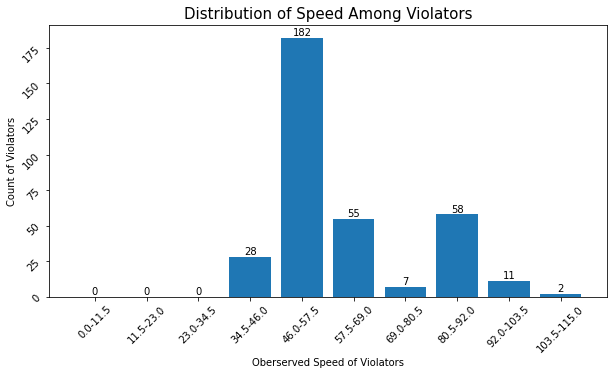

In [57]:
#Plots a histogram of the distribution of driving speed among violators

# create 10 bins between 0 and 4 with equal width
bins = np.linspace(0, 115, 11)
fig, ax = plt.subplots(figsize=(10, 5))

# get the labels for the bins
bin_labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# cut the GPA values into the bins
bin_counts = pd.cut(badge_num_530_yr_2016_dem['ObservedSpeed'], bins=bins, labels=bin_labels, include_lowest=True).value_counts(sort=False)

# create a bar graph of the bin counts with increased width
plt.bar(bin_counts.index.astype(str), bin_counts.values, width=0.8)

for container in ax.containers:
    ax.bar_label(container)

# set x-axis label
plt.xlabel('Oberserved Speed of Violators')
plt.xticks(rotation=45) 

# set y-axis label
plt.ylabel('Count of Violators')
plt.yticks(rotation=45) 

#Set graph title
plt.title('Distribution of Speed Among Violators', fontsize = 15)

# show the plot
plt.show()

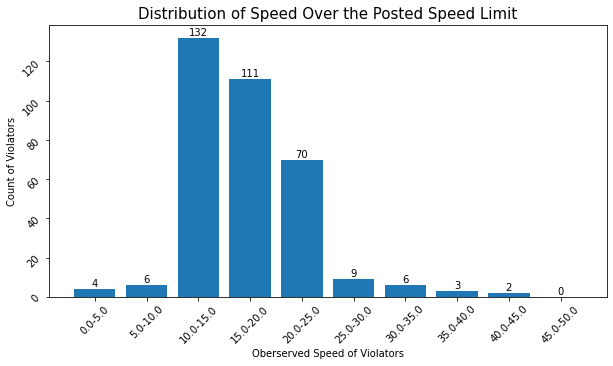

In [58]:
#Plots a histogram of the distribution of driving speed over the posted speed limit among violators

# create 10 bins between 0 and 4 with equal width
bins = np.linspace(0, 50, 11)
fig, ax = plt.subplots(figsize=(10, 5))

# get the labels for the bins
bin_labels = [f"{bins[i]:.1f}-{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# cut the GPA values into the bins
bin_counts = pd.cut(badge_num_530_yr_2016_dem['MPH_Over_PostedSpeed'], bins=bins, labels=bin_labels, include_lowest=True).value_counts(sort=False)

# create a bar graph of the bin counts with increased width
plt.bar(bin_counts.index.astype(str), bin_counts.values, width=0.8)

for container in ax.containers:
    ax.bar_label(container)

# set x-axis label
plt.xlabel('Oberserved Speed of Violators')
plt.xticks(rotation=45) 

# set y-axis label
plt.ylabel('Count of Violators')
plt.yticks(rotation=45) 

#Set graph title
plt.title('Distribution of Speed Over the Posted Speed Limit', fontsize = 15)

# show the plot
plt.show()